# Group Challenge 5: Advanced Measure Region Properties

Create a plugin that measures region properties and displays the results as a table. Use QtPy to implement this plugin. The plugin should enable users to:

1) Select an image layer
2) Choose what region properties to measure
3) Save the output to a specified path as a CSV file
4) Display the measured region properties in a table
5) Optional: Add a logo

- Watch [this demo video](https://youtu.be/EPGl5ZUeskU) to see the plugin in action

### Segment cells with Cellpose

To define what regions to measure, you must first segment the selected image. Here, you should use Cellpose to segment the nuclei in the sample dataset (see Practical 2).

### Measure region properties

To obtain region property measurements, use the `measure.regionprops` function from `scikit-image`. Your plugin should include all region properties of type `int` and `float`. 

- [Documentation for `skimage.measure.regionprops` function](https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops)

### Save data as a CSV file

You will also need to define a function that saves the output to the specified file path. 

### Create a file dialog window

To enable users to specify a path to save the output, you need to design a file dialog widget. Use a `QFileDialog` widget in combination with a `QLineEdit` and `QPushButton` widget.

Here's an example of how your file dialog could look:
```python
line_edit = QLineEdit(...)
button = QPushButton(...)
button.clicked.connect(self._select_path)      
```

```python
def _select_path(self):
    # Use a QFileDialog widget here that modifies the QLineEdit widget
```

### Adding tabs

Your plugin should contain three tabs: 
- a main tab to set a filepath and to run the `regionprops` function,
- a parameter tab to select what properties to measure and
- a tab showing a results table

Here's an example of how to add a tab to a `QTabWidget`:
```python 
tab_widget = QTabWidget()
some_widget = QWdiget()
tab_widget.addTab(some_widget, 'Tab')
```

### Adding tables

After executing the `regionprops` function, your plugin should display the results in a separate tab as a table with a `QTableWidget` widget. 

Here's how to define a `QTableWidget` where the user cannot change the values:
```python
self.table = QTableWidget(self)
self.table.setEditTriggers(QAbstractItemView.NoEditTriggers)
```

To populate your table, you will need to define an `_update_table` function. 

This is how you modify the number of columns and add column headers:
```python
# num_cols must be integer
num_cols = ...
self.table.setColumnCount(num_cols)

# Headers must be a list of strings
header_list = [...] 
self.table.setHorizontalHeaderLabels(...)
```

This is how you add a new row to your table:
```python
self.table.insertRow(self.table.rowCount())
```

This is how you modify the entries in your table:
```python
# row and col must be integers
row = ... 
col = ...
self.table.setItem(row, col, QTableWidgetItem(str(...)))
```

In [1]:
from skimage import data
from skimage.util import img_as_float
import matplotlib.pyplot as plt
import numpy as np

import napari
from magicgui import magicgui

from napari.layers import Image
from napari.types import LabelsData
import pathlib
%load_ext autoreload
%autoreload 2

## Load sample data

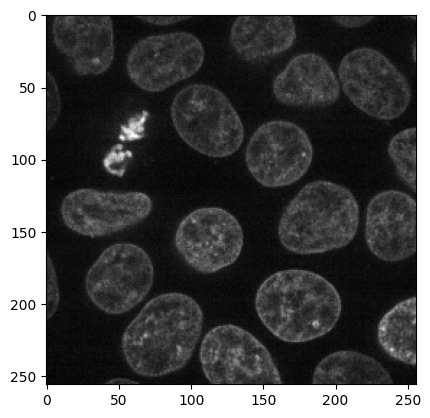

In [2]:
from skimage import data
import matplotlib.pyplot as plt

IMAGE2D = data.cells3d()[30,1]

plt.imshow(IMAGE2D, cmap='gray')

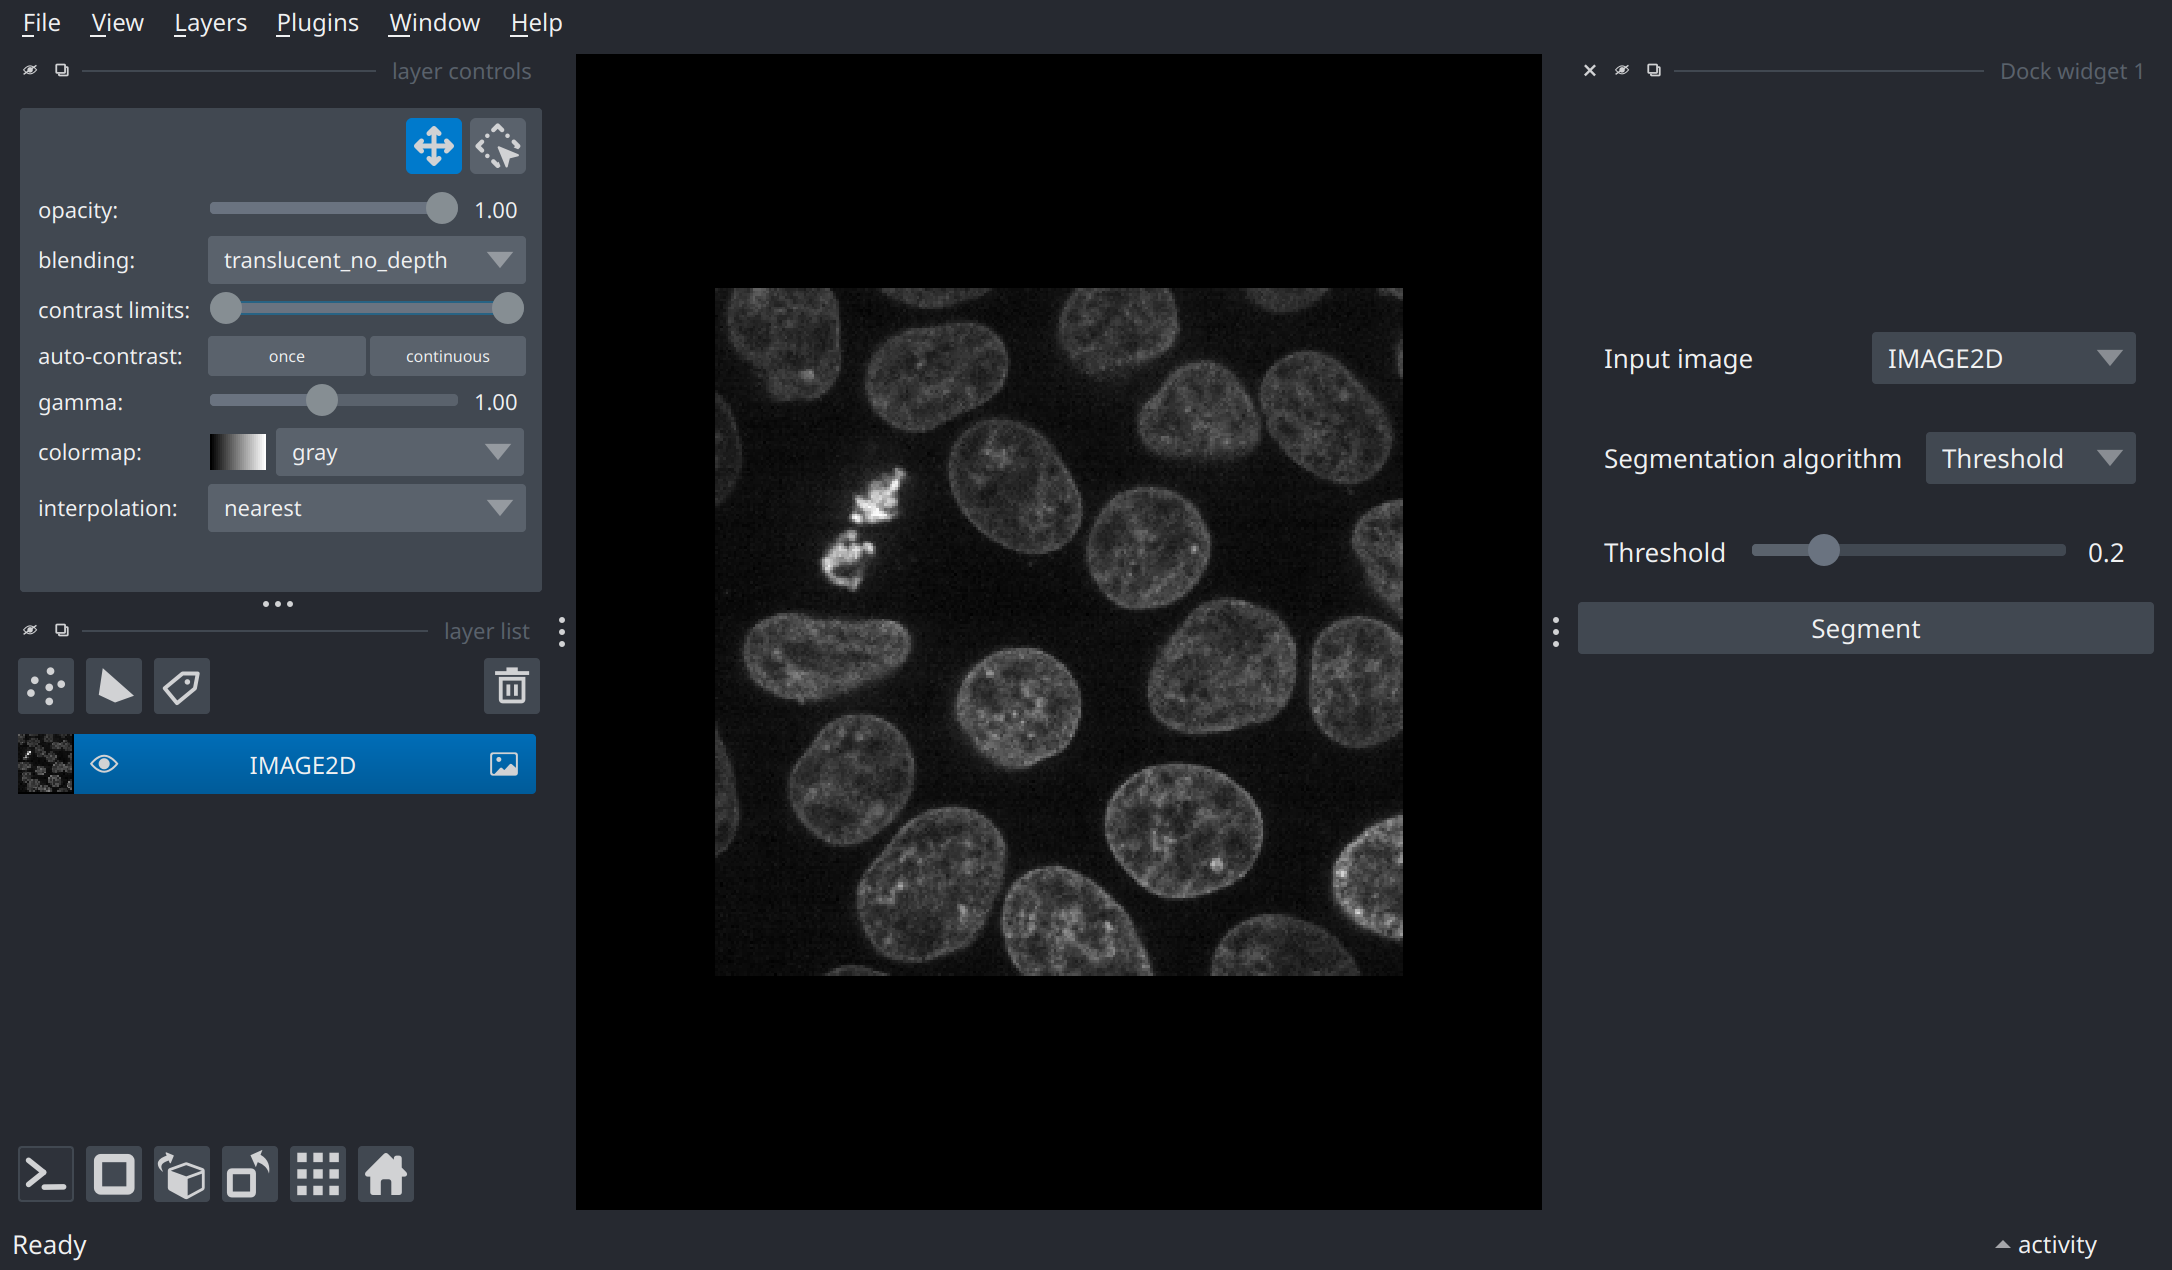

In [4]:
# Your plugin
from segment_image import SegmentImage

viewer = napari.view_image(IMAGE2D)
widget = SegmentImage(napari_viewer=viewer)
viewer.window.add_dock_widget(widget)
napari.utils.nbscreenshot(viewer)